# Jupyter Notebook: An environment for complete EDA 

####  Reppas Dimitris - dhmhtrhsreppas@gmail.com



###  Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # library used for visualization 
import seaborn as sns # library used for visualization 
import sqlite3 # library which gives the opportunity to connect with sglite3 database
from io import StringIO # library used for the comparison of two Queries
import datacompy # library used for the comparison of two Queries

### Connection with DBMS
1. In this particular example we connect with nba_salary.sqlite. More information about this database can be found: https://www.kaggle.com/rikdifos/nba-salary-and-statistics-201617 
2. Ofcourse the user can connect to a different database by simply put the name of the db in the " ".

In [2]:
conn = sqlite3.connect("nba_salary.sqlite") #connection with the database

### Primary information for the content of the selected db
Here we use .read_sql from pandas in order to extract information by writing in SQL

In [3]:
# Find which tables are contained in the db
pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)


,type,name,tbl_name,rootpage,sql
0,table,NBA_season1718_salary,NBA_season1718_salary,2,CREATE TABLE `NBA_season1718_salary` (\n `X1`...
1,table,Seasons_Stats,Seasons_Stats,8,"CREATE TABLE `Seasons_Stats` (\n `X1` REAL,\n..."


In [4]:
# Choose a table and see key characteristics of each attribute
pd.read_sql_query("""
PRAGMA table_info('Seasons_Stats');
""", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,X1,REAL,0,None,0
1,1,Year,REAL,0,None,0
2,2,Player,TEXT,0,None,0
3,3,Pos,TEXT,0,None,0
4,4,Age,REAL,0,None,0
5,5,Tm,TEXT,0,None,0
6,6,G,REAL,0,None,0
7,7,GS,INTEGER,0,None,0
8,8,MP,REAL,0,None,0
9,9,PER,REAL,0,None,0


### Pose an initial Query and see the observations

In [5]:
Q = pd.read_sql("""
SELECT  Player, Pos, Age, Tm, MP, FG, FTA, PTS
FROM Seasons_Stats

;""", conn)
Q

,Player,Pos,Age,Tm,MP,FG,FTA,PTS
0,Curly Armstrong,G-F,31.0,FTW,NaN,144.0,241.0,458.0
1,Cliff Barker,SG,29.0,INO,NaN,102.0,106.0,279.0
2,Leo Barnhorst,SF,25.0,CHS,NaN,174.0,129.0,438.0
3,Ed Bartels,F,24.0,TOT,NaN,22.0,34.0,63.0
4,Ed Bartels,F,24.0,DNN,NaN,21.0,31.0,59.0
...,...,...,...,...,...,...,...,...
24686,Cody Zeller,PF,24.0,CHO,1725.0,253.0,196.0,639.0
24687,Tyler Zeller,C,27.0,BOS,525.0,78.0,39.0,178.0
24688,Stephen Zimmerman,C,20.0,ORL,108.0,10.0,5.0,23.0
24689,Paul Zipser,SF,22.0,CHI,843.0,88.0,40.0,240.0


## ANALYZING THE ATTRIBUTES OF AN INITIAL QUERY

In [6]:
Q.describe() #extraction of descriptive statistics for the numerical attributes

,Age,MP,FG,FTA,PTS
count,24616.000000,24138.000000,24624.000000,24624.000000,24624.000000
mean,26.664405,1209.720317,195.325820,136.775219,510.116350
std,3.841892,941.146575,188.114361,146.078918,492.922981
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,340.000000,41.000000,27.000000,106.000000
50%,26.000000,1053.000000,141.000000,88.000000,364.000000
75%,29.000000,1971.000000,299.000000,201.000000,778.000000
max,44.000000,3882.000000,1597.000000,1363.000000,4029.000000


In [7]:
Q.isnull().sum() #find how many null values contain each attribute

Player     67
Pos        67
Age        75
Tm         67
MP        553
FG         67
FTA        67
PTS        67
dtype: int64

In [8]:
Q.dropna(how='all', axis=1, inplace=True) # if the whole column is empty drop it 

In [9]:
# Here the attributes will be grouped to numerical and categorical
numerical_attributes = Q.select_dtypes(include=['number']).columns
categorical_attributes = Q.select_dtypes(include=['object']).columns

### Analyzing Numerical Variables 

In [10]:
#See which attributes are numerical
numerical_attributes

Index(['Age', 'MP', 'FG', 'FTA', 'PTS'], dtype='object')

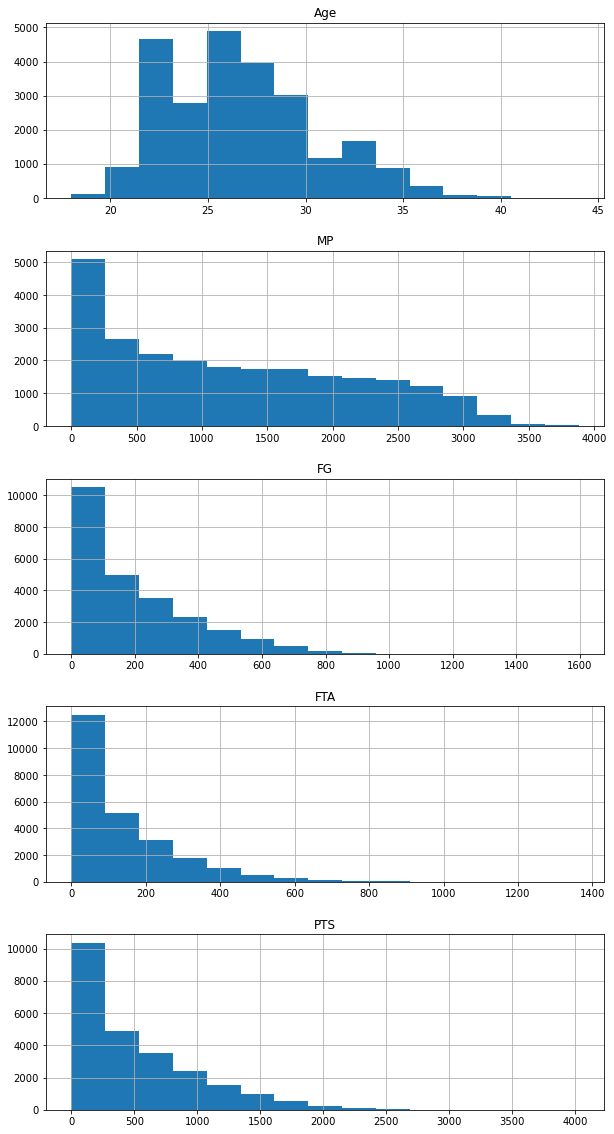

In [11]:
#Take the histogram of each numerical attribute
Q[numerical_attributes].hist(bins=15, figsize=(10, 20), layout=(len(numerical_attributes), 1));

### Analyzing Categorical Variables

In [12]:
#See which attributes are categorical
categorical_attributes
 

Index(['Player', 'Pos', 'Tm'], dtype='object')

C:\Users\Dimitris Reppas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dimitris Reppas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dimitris Reppas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


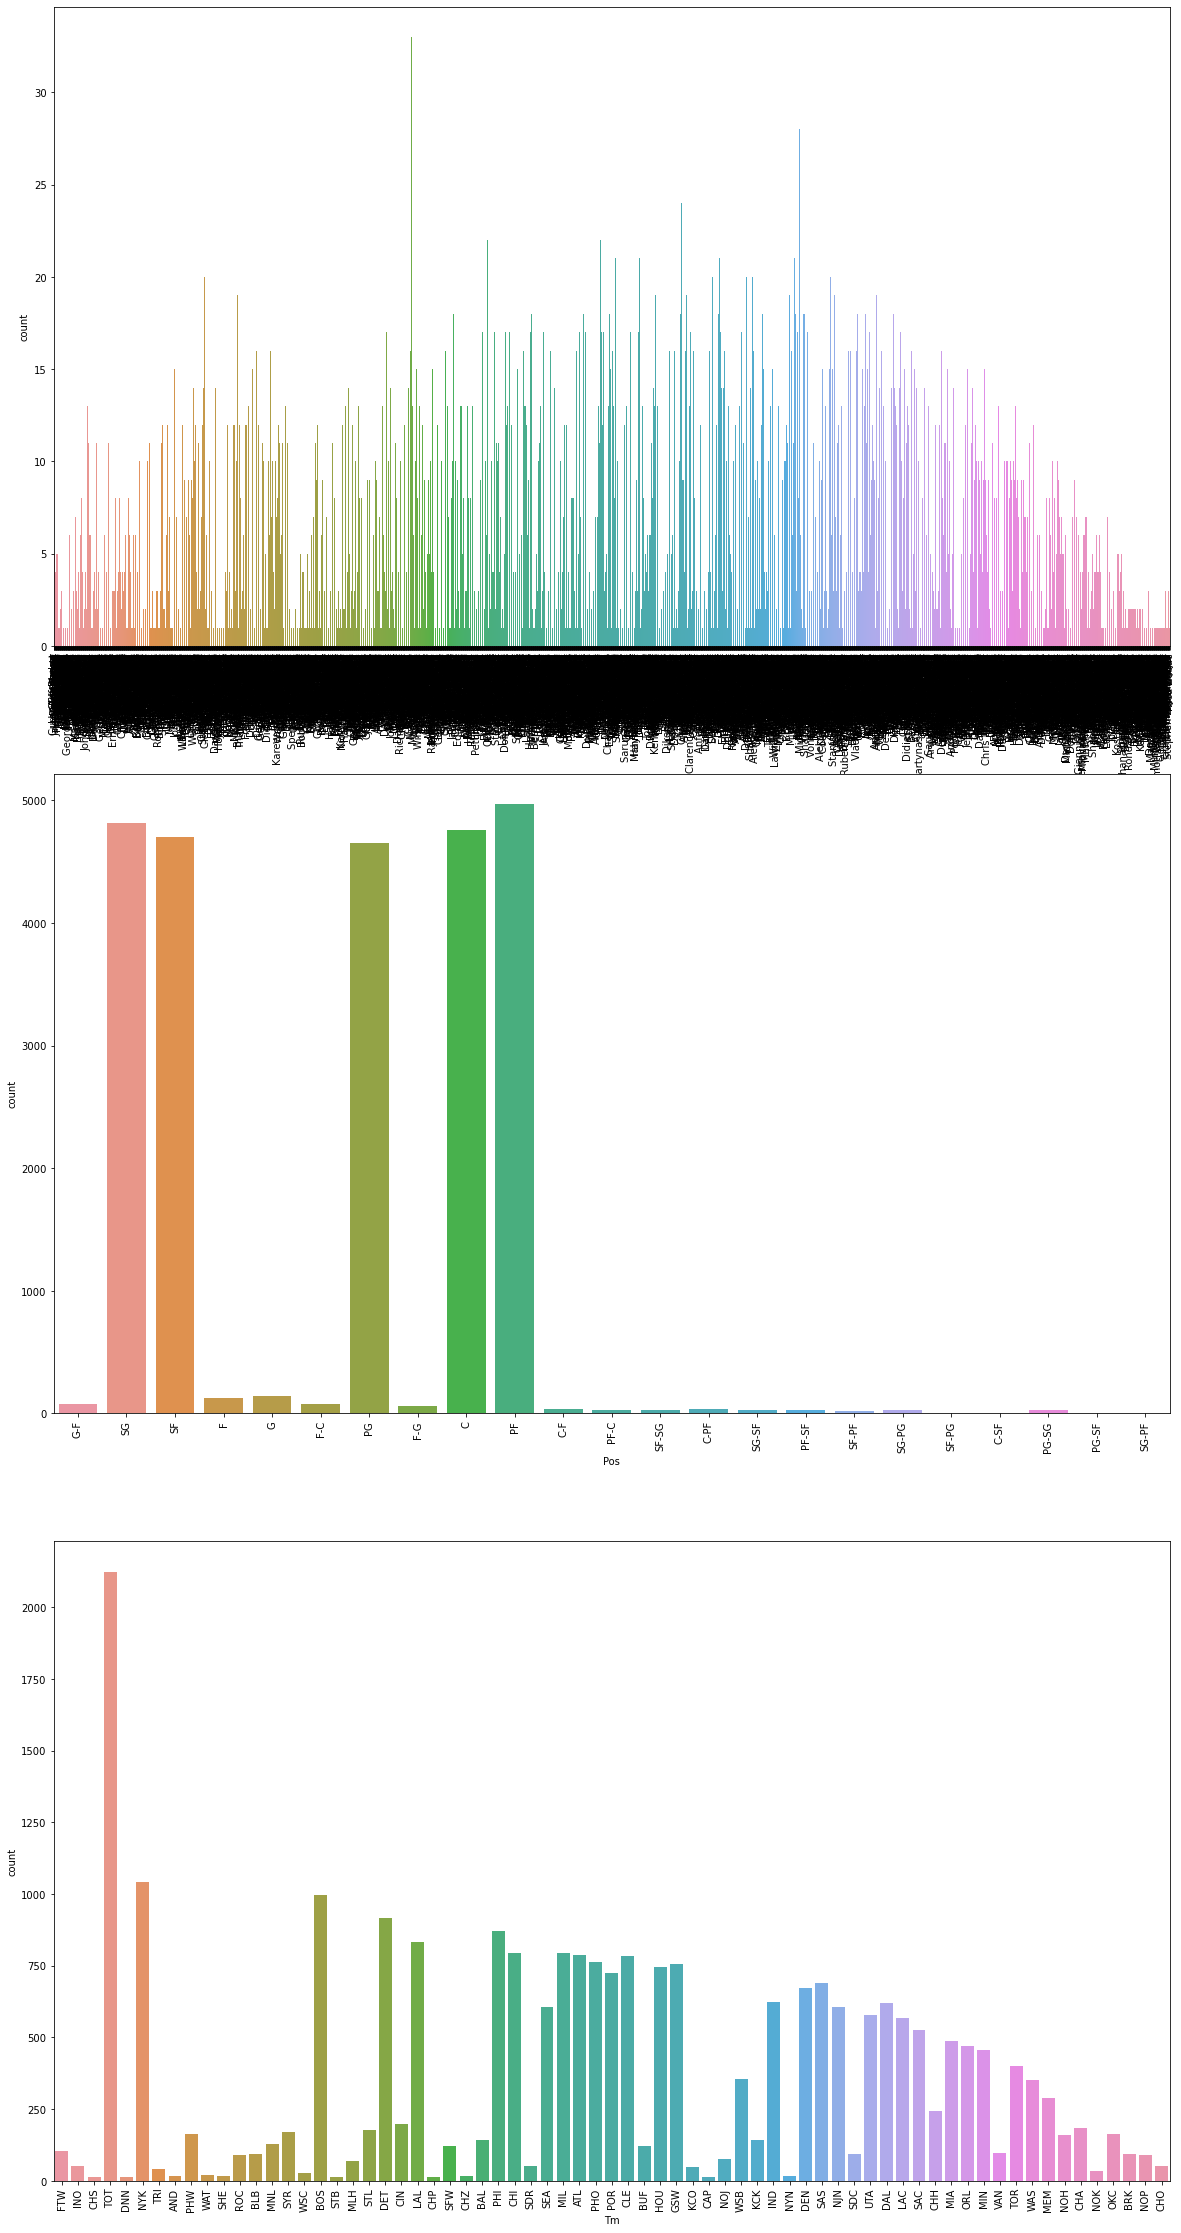

In [13]:
# Use bar plots for each categorical attribute
fig, ax = plt.subplots(len(categorical_attributes), 1, figsize=(20, 40))
for variable, subplot in zip(categorical_attributes, ax.flatten()):
    sns.countplot(Q[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Analyzing Relationships Between Numerical Variables

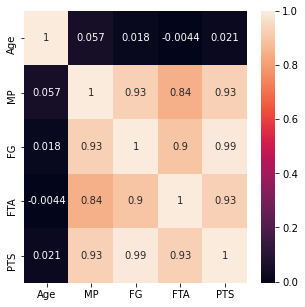

In [14]:
#Plot the correlation matrix of the numerical attributes
plt.figure(figsize=(5,5))
corr = Q.corr()
sns.heatmap(Q.corr(),annot=True)
plt.show()

In [15]:
# from the correlation matrix hold only the high correlated and print the results
pos_ =  corr[corr >= 0.80]
neg_ = corr[corr <= -0.80]
print(pos_)


     Age        MP        FG       FTA       PTS
Age  1.0       NaN       NaN       NaN       NaN
MP   NaN  1.000000  0.925628  0.844650  0.926767
FG   NaN  0.925628  1.000000  0.896438  0.993492
FTA  NaN  0.844650  0.896438  1.000000  0.926017
PTS  NaN  0.926767  0.993492  0.926017  1.000000


In [16]:
print(neg_)

     Age  MP  FG  FTA  PTS
Age  NaN NaN NaN  NaN  NaN
MP   NaN NaN NaN  NaN  NaN
FG   NaN NaN NaN  NaN  NaN
FTA  NaN NaN NaN  NaN  NaN
PTS  NaN NaN NaN  NaN  NaN


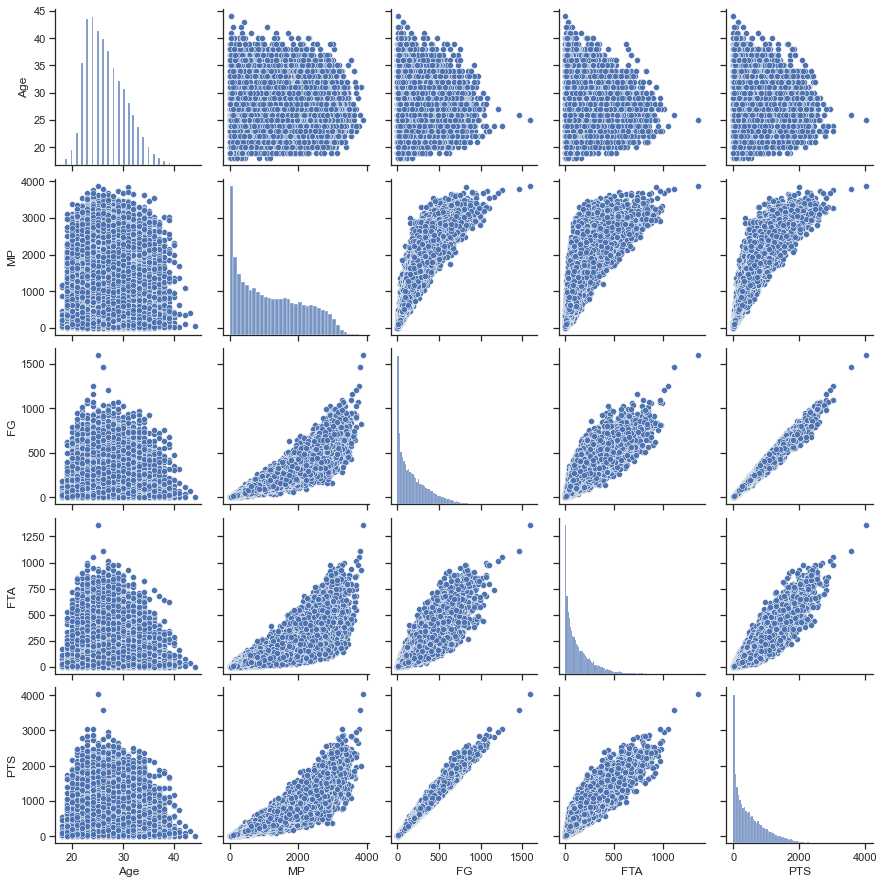

In [17]:
# use Scatter plots for all numerical attributes pairs
sns.set_theme(style="ticks")
sns.pairplot(Q,palette='red')

## FIND SIMILARITIES BETWEEN TWO QUERIES 
Here DataComPy library will be used

In [18]:
#Pose the first Query
Q1=pd.read_sql("""SELECT Player, Pos, Tm
                        FROM Seasons_Stats
                        WHERE Year=2017;""", conn).drop_duplicates(subset="Player")
Q1

,Player,Pos,Tm
0,Alex Abrines,SG,OKC
1,Quincy Acy,PF,TOT
4,Steven Adams,C,OKC
5,Arron Afflalo,SG,SAC
6,Alexis Ajinca,C,NOP
...,...,...,...
590,Cody Zeller,PF,CHO
591,Tyler Zeller,C,BOS
592,Stephen Zimmerman,C,ORL
593,Paul Zipser,SF,CHI


In [19]:
#Pose the second Query
Q2=pd.read_sql("""SELECT Player, Pos, Tm
                        FROM Seasons_Stats
                        WHERE Year=2016;""", conn).drop_duplicates(subset="Player")
Q2

,Player,Pos,Tm
0,Quincy Acy,PF,SAC
1,Jordan Adams,SG,MEM
2,Steven Adams,C,OKC
3,Arron Afflalo,SG,NYK
4,Alexis Ajinca,C,NOP
...,...,...,...
573,Joe Young,PG,IND
574,Nick Young,SG,LAL
575,Thaddeus Young,PF,BRK
576,Cody Zeller,C,CHO


In [20]:
# Use the following function in order to compare the two Queries
compare = datacompy.Compare(
    Q1,
    Q2,
    join_columns='Player',  #You can also specify a list of columns
    abs_tol=0, #Optional, defaults to 0
    rel_tol=0, #Optional, defaults to 0
    df1_name='Query 1', #Optional, defaults to 'df1'
    df2_name='Query 2' #Optional, defaults to 'df2'
    )
#compare.matches(ignore_extra_columns=False)
compare.matches()
# False

# This method prints out a human-readable report summarizing and sampling differences
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0   Query 1        3   486
1   Query 2        3   476

Column Summary
--------------

Number of columns in common: 3
Number of columns in Query 1 but not in Query 2: 0
Number of columns in Query 2 but not in Query 1: 0

Row Summary
-----------

Matched on: player
Any duplicates on match values: No
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 385
Number of rows in Query 1 but not in Query 2: 101
Number of rows in Query 2 but not in Query 1: 91

Number of rows with some compared columns unequal: 190
Number of rows with all compared columns equal: 195

Column Comparison
-----------------

Number of columns compared with some values unequal: 2
Number of columns compared with all values equal: 1
Total number of values which compare unequal: 209

Columns with Unequal Values or Types
------------------------------------

  Column Query 1 dtype Query 2 dtype  # Un

In [21]:
conn.close() #Close the connection  with the DBMS!